In [1]:
%matplotlib inline
from pprint import pprint
from collections import defaultdict

import numpy as np
import math
import matplotlib.pyplot as plt
import warnings


from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import SGDClassifier

from sklearn.grid_search import GridSearchCV
from sklearn import metrics

from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve

import sys
sys.path.append('../dev')
from ml_plot import plot_validation_curve
from ml_plot import PredictCV, my_plot_learning_curve
from ml_plot import plot_prediction_curve
from ml_plot import get_dataset, eval_predictions

# Configuration

In [2]:
# PROJECT = 'nova'
# PROJECT = 'swift'
# PROJECT = 'cinder'
PROJECT = 'heat'
# PROJECT = 'glance'

# IMPORTANCE = 'crit'
# IMPORTANCE = 'high+'
IMPORTANCE = 'med+'
# IMPORTANCE = 'low+'

# SIZE = 100
#SIZE = 250
# SIZE = 0.1
SIZE = 0.5

SCORING = 'f1'         # (precision * recall) / (precision + recall)
# SCORING = 'accuracy'   # (TP + TN) / all values
# SCORING = 'precision'  # TP / (TP + FP)
# SCORING = 'recall'     # TP / (TP + FN)
# SCORING = 'average_precision'
# SCORING = 'roc_auc'

JOBS = 4
VERBOSE = 0

warnings.filterwarnings("ignore", 'F-score is ill-defined')

# Load Data

In [3]:
%%capture
Y, X = get_dataset(PROJECT, IMPORTANCE)

### Select Split Strategy

In [4]:
cv = PredictCV(len(Y), history=700, future=200, n_iter=10)

# Initial Parameter Settings

In [5]:
estimator = LogisticRegression()

In [6]:
C_range = np.logspace(-1, 8, 10)
param_grid = dict(C=C_range, class_weight=['auto'])

In [7]:
grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv, scoring=SCORING,
                    n_jobs=JOBS, pre_dispatch=2*JOBS, verbose=VERBOSE)
grid.fit(X, Y)
print 'best_score: ', grid.best_score_
clf = grid.best_estimator_
grid.best_estimator_

best_score:  0.392757690894


LogisticRegression(C=0.10000000000000001, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [8]:
grid.best_estimator_

LogisticRegression(C=0.10000000000000001, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

# Validation Curves Example

### Impact of C

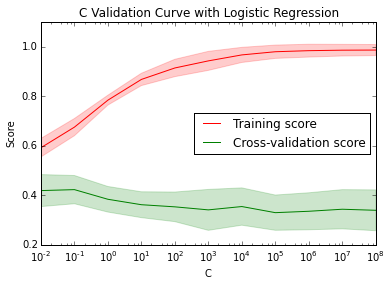

Best score of 0.423077568694 when setting C to 0.1


LogisticRegression(C=0.10000000000000001, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [9]:
best_score, param_val, param_name = \
    plot_validation_curve(clf, X, Y, "C", np.logspace(-2, 8, 11),
                      "C Validation Curve with Logistic Regression",
                      cv=cv, scoring=SCORING, n_jobs=JOBS)
print 'Best score of', best_score, 'when setting', param_name, 'to',  param_val
clf.set_params(**dict([[param_name, param_val]]))

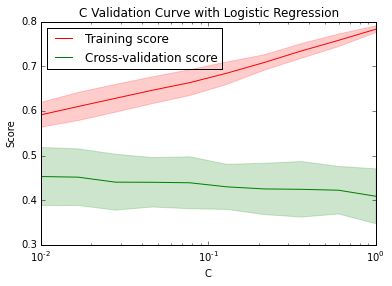

Best score of 0.453268734096 when setting C to 0.01


LogisticRegression(C=0.01, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [10]:
param_log10 = math.log10(param_val)
best_score, param_val, param_name = \
    plot_validation_curve(clf, X, Y, param_name, np.logspace(param_log10 - 1, param_log10 + 1, 10),
                      "C Validation Curve with Logistic Regression",
                      cv=cv, scoring=SCORING, n_jobs=JOBS)
print 'Best score of', best_score, 'when setting', param_name, 'to',  param_val
clf.set_params(**dict([[param_name, param_val]]))

### Learning Curve

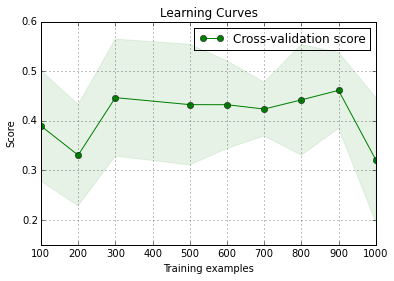

In [11]:
title = "Learning Curves"
my_plot_learning_curve(clf, title, X, Y,
                           n_jobs=JOBS, future=100,
                           history_sizes=[100, 200, 300, 500, 600, 700, 800, 900, 1000])
plt.show()

### Prediction Curve

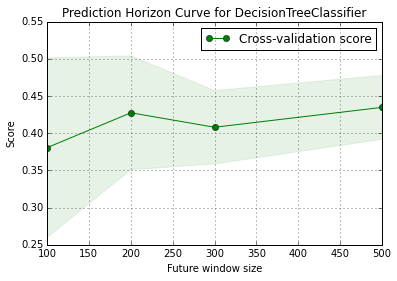

In [12]:
title = "Prediction Horizon Curve for DecisionTreeClassifier"
plot_prediction_curve(clf, title, X, Y,
                           n_jobs=JOBS, history=700,
                           future_sizes=[100, 200, 300, 500])
plt.show()

In [13]:
LR_results = eval_predictions(clf, X, Y, history_sizes=[300, 500, 900, 1000], future_sizes=[100, 200, 500])

** Predictions for hist=300 future=100 **

F1:        0.41  +/- 0.15
Accuracy:  0.63  +/- 0.07
Precision: 0.39  +/- 0.11
Recall:    0.46  +/- 0.20

Aggregate Confusion Matrix - 10 iterations
[[476 214]
 [155 155]]


** Predictions for hist=300 future=200 **

F1:        0.41  +/- 0.11
Accuracy:  0.62  +/- 0.04
Precision: 0.36  +/- 0.11
Recall:    0.48  +/- 0.15

Aggregate Confusion Matrix - 10 iterations
[[955 469]
 [288 288]]


** Predictions for hist=300 future=500 **

F1:        0.44  +/- 0.07
Accuracy:  0.61  +/- 0.07
Precision: 0.39  +/- 0.05
Recall:    0.54  +/- 0.14

Aggregate Confusion Matrix - 10 iterations
[[2240 1265]
 [ 672  823]]


** Predictions for hist=500 future=100 **

F1:        0.44  +/- 0.09
Accuracy:  0.59  +/- 0.05
Precision: 0.39  +/- 0.13
Recall:    0.54  +/- 0.11

Aggregate Confusion Matrix - 10 iterations
[[423 266]
 [143 168]]


** Predictions for hist=500 future=200 **

F1:        0.42  +/- 0.08
Accuracy:  0.64  +/- 0.09
Precision: 0.44  +/- 0.13
Recall:    